# About the Project

In [1]:

# Question 1:  This is a comprehensive dataset reflecting a company's sale accross 49 states between 2015 and 2018.
#              This research will focus on sales growth trends in California by comparing total sales in 2017 and 2018.
#              It will provide good ground to further a granular research into specific products that experience growth in sales
#              to both replicate success in other states and possibly focuse more on those products.
# Question 2:  The link to the dataset -- https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales
# Question 3:  Primary question:
#              On average, was there growth in sales in the state of California in the year 2018 compared to the year 2017,
#              given the samples that have been collected.
#              Subsequent question:
#              If yes, what were specific product categories that contributed more significantly to the growth in sales in California
#              in 2018, and what factors influenced these trends.
# Question 4:  Primary Research Question:
#              Hypothesis(H1): There was a statistically significant increase in the average sales in California in 2018 compared to 2017.
#              Null Hypothesis(H0): There was no statistically significant change in the average sales in California between 2017 and 2018.
#              *******  if data is normally distributed I will use independent sample's t-test, if not will use Mann-Whitney U Test.  *******
#              Subsequent Research Question:
#              Hypothesis(H1): Certain product categories contributed significantly more to the sales growth in California in 2018 compared to others.
#              Null Hypothesis(H0): No specific product category significantly outperformed others in contributing to sales growth in California in 2018.
#              *******  if data is normallly distributed will use one way ANOVA test to test multiple groups of products, if not will use Kruskal-Walis test   *******
# Question 5:  Will load the data, then filter to only California and devide in two groups by year 2017 and 2018. Then will proceed with the first question.
#              If H1 is established, will then proceed to the second question and test each product category.
# Question 6:  This research would be valuable to the company operating the store, since the research will shed light on whether there is progress in year to year
#              sale, what contributes to the increased sale, what product is selling more and what are the contributing factors for this increase. The company then
#              can zero in on these factors to possibly replicate success in other states to increase sales in all the states.
# Question 7:  The audience or the public in general will benefit from this because the company will focus on those products that has more demand by the public.
#              The research is a way of conversation between consumers and sellers to understand demand and adjust products based on demand which benefits the public.


#######  This dataset is very rich including multiple aspects, I couldn't think of any other variable that could be useful for the purpose of this discussion  #######
#######  I also couldn't find potential for bias in the data collection, since this is total number of all actual sales the store had  #######



# Import Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import kruskal
from scipy.stats import shapiro
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
from matplotlib.ticker import FixedLocator

sales = pd.read_csv('/content/drive/MyDrive/Fundamentals/superstore_final_dataset.csv', encoding='ISO-8859–1')
sales.head(10)
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Data Cleaning

In [3]:
# Remove duplicates and convert column names to lower case
sales = sales.drop_duplicates()

# Converting to lower case
sales.columns = sales.columns.str.lower()
for col in sales.select_dtypes(include=[object]).columns:
    sales[col] = sales[col].str.lower()

# Convert 'order_date' to datetime format
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d/%m/%Y', errors='coerce')

# Fill missing postal codes with '0000'
sales['postal_code'] = sales['postal_code'].fillna('0000')

# Ensure all sales data are numeric
sales['sales'] = pd.to_numeric(sales['sales'], errors='coerce')

# Check for missing values
missing_values = sales.isnull().sum()
print("Missing Values")
print(missing_values)

# Filter data to only California and divide it into two groups by year 2017 and 2018
sales_ca = sales[sales['state'] == 'california'].copy()
sales_ca['year'] = sales_ca['order_date'].dt.year
sales_ca_17 = sales_ca[sales_ca['year'] == 2017]
sales_ca_18 = sales_ca[sales_ca['year'] == 2018]

sales_ca.head(2)

Missing Values
row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
dtype: int64


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,year
2,3,ca-2017-138688,2017-06-12,16/06/2017,second class,dv-13045,darrin van huff,corporate,united states,los angeles,california,90036.0,west,off-la-10000240,office supplies,labels,self-adhesive address labels for typewriters b...,14.62,2017
5,6,ca-2015-115812,2015-06-09,14/06/2015,standard class,bh-11710,brosina hoffman,consumer,united states,los angeles,california,90032.0,west,fur-fu-10001487,furniture,furnishings,eldon expressions wood and plastic desk access...,48.86,2015


# Data Exploration

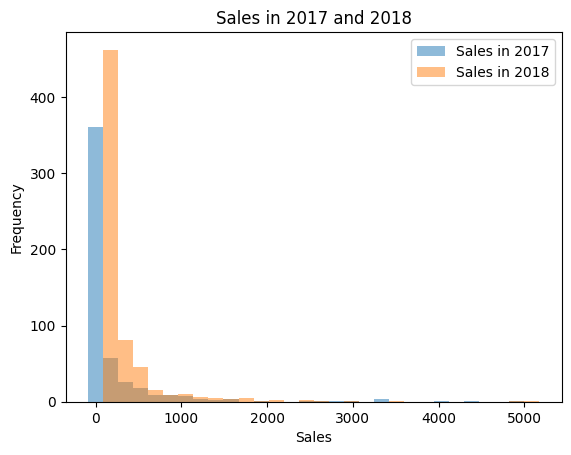

<Axes: title={'center': 'sales'}, xlabel='year'>

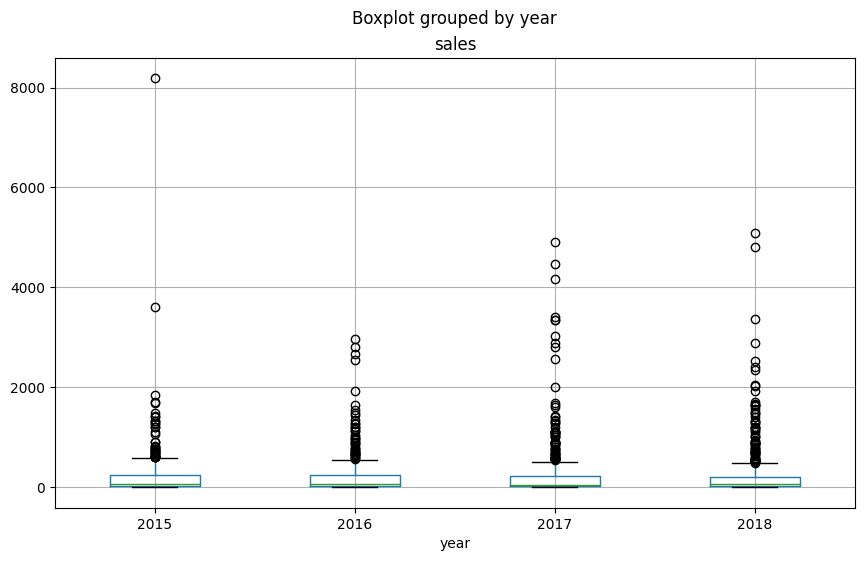

In [4]:
# Now I proceed to the first research question, whether there is difference in means in sales
#    for the two years. I made histograms that show slightly more sales in 2018 but the box plot
#    initially reveals outliers in kurtosis in both years and otherwise similar data.

bins = np.linspace(min(sales_ca_17['sales'].min(), sales_ca_18['sales'].min()),
                   max(sales_ca_17['sales'].max(), sales_ca_18['sales'].max()), 30)

plt.hist(sales_ca_17['sales'], bins=bins, alpha=0.5, label='Sales in 2017', align='left')
plt.hist(sales_ca_18['sales'], bins=bins, alpha=0.5, label='Sales in 2018', align='right')

plt.legend(loc='upper right')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales in 2017 and 2018')
plt.show()

sales_ca.boxplot('sales', by = 'year', figsize = (10, 6))


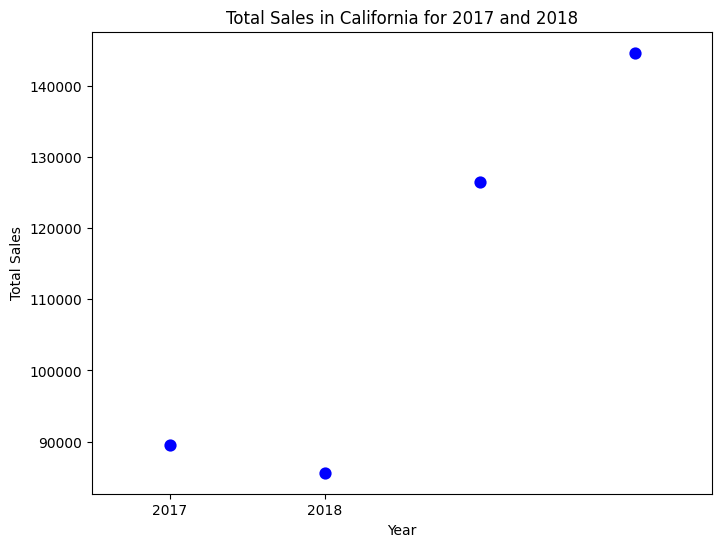

In [5]:
# Pointplot shows higher total sales in the year 2018 than 2017.

plt.figure(figsize=(8, 6))
total_sales_by_year = sales_ca.groupby('year')['sales'].sum().reset_index()
g = sns.pointplot(x='year', y='sales', data=total_sales_by_year, capsize=0.1, color="blue", linestyle='None')
g.set_xticks([0, 1])  # Explicitly set x-ticks positions
g.set_xticklabels(['2017', '2018'])  # Set custom labels for the x-axis ticks
g.set_title('Total Sales in California for 2017 and 2018')
g.set_xlabel('Year')
g.set_ylabel('Total Sales')
g.xaxis.set_major_locator(FixedLocator([0, 1]))
plt.show()

# Statistical Testing

In [6]:
# Shapiro-Wilk Test for normality reveals that both 2017 and 2018 sales data have high skewness and kurtosis values.

print("Descriptive statistics for 2017 sales:")
print(stats.describe(sales_ca_17['sales']))
print("Descriptive statistics for 2018 sales:")
print(stats.describe(sales_ca_18['sales']))
print("Shapiro-Wilk test for 2017 sales:")
print(stats.shapiro(sales_ca_17['sales']))
print("Shapiro-Wilk test for 2018 sales:")
print(stats.shapiro(sales_ca_18['sales']))

Descriptive statistics for 2017 sales:
DescribeResult(nobs=508, minmax=(3.15, 4912.59), mean=249.1003218503937, variance=312201.3773404845, skewness=4.816257308055658, kurtosis=27.99225599024131)
Descriptive statistics for 2018 sales:
DescribeResult(nobs=652, minmax=(0.99, 5083.96), mean=221.8815467791411, variance=216669.90455509577, skewness=5.316660913774219, kurtosis=39.458064662794364)
Shapiro-Wilk test for 2017 sales:
ShapiroResult(statistic=0.4455324411392212, pvalue=9.073030439060471e-37)
Shapiro-Wilk test for 2018 sales:
ShapiroResult(statistic=0.4645543098449707, pvalue=3.5765901224348036e-40)


In [7]:
# The descriptive statistics also reveals that both 2017 and 2018 sales data have high skewness and kurtosis values.
#     both over the threshhold of 3. From here we can conclude that data is not evenly distributed.
#     Also after conducting Shapiro-Wilk test to determin normality, both p-values are significantly
#     lower than 0.05 threshhold, so we can reject the null hypothesis in both cases.  #######
print(stats.describe(sales_ca_17['sales']))
print(stats.describe(sales_ca_18['sales']))
print(stats.shapiro(sales_ca_17['sales']))
print(stats.shapiro(sales_ca_18['sales']))


DescribeResult(nobs=508, minmax=(3.15, 4912.59), mean=249.1003218503937, variance=312201.3773404845, skewness=4.816257308055658, kurtosis=27.99225599024131)
DescribeResult(nobs=652, minmax=(0.99, 5083.96), mean=221.8815467791411, variance=216669.90455509577, skewness=5.316660913774219, kurtosis=39.458064662794364)
ShapiroResult(statistic=0.4455324411392212, pvalue=9.073030439060471e-37)
ShapiroResult(statistic=0.4645543098449707, pvalue=3.5765901224348036e-40)


In [8]:
# Confidence interval for the two years indicates that there is an overlap in confidence interval and we cannot say conclusively that there is a
#    significant difference in the mean sales between 2017 and 2018 based on confidence interval alone.

def bootstrap_confidence_interval(data, n_bootstrap=10000, ci=95):
    bootstrap_samples = np.random.choice(data, size=(n_bootstrap, len(data)), replace=True)
    bootstrap_mean = np.mean(bootstrap_samples, axis=1)
    lower_bound = np.percentile(bootstrap_mean, (100-ci)/2)
    upper_bound = np.percentile(bootstrap_mean, 100-(100-ci)/2)
    return lower_bound, upper_bound

ci_2017 = bootstrap_confidence_interval(sales_ca_17['sales'].values)
ci_2018 = bootstrap_confidence_interval(sales_ca_18['sales'].values)

print(f"95% confidence interval for 2017 sales: {ci_2017}")
print(f"95% confidence interval for 2018 sales: {ci_2018}")



95% confidence interval for 2017 sales: (203.05538710629924, 300.0814178149606)
95% confidence interval for 2018 sales: (188.13597273773007, 259.1295579371166)


In [9]:
# Mann-Whitney U Test
#      Because data is not normally distributed I will be using Mann-Whitney U Test instead of t-test
#      The test result (p=0.859) indicates that the aparent difference in sales for 2017 and 2018 could
#      reasonably have occurred by chance. Given this result, we cannot support the alternative hypothesis (H1)
#      stating that there was a statistically significant increase (or decrease) in sales in 2018 compared to 2017.
#      Instead, the data support the null hypothesis (H0) of no difference in the distribution of sales between the two years.  #######
stat, p = mannwhitneyu(sales_ca_17['sales'], sales_ca_18['sales'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=164605.000, p=0.859
Same distribution (fail to reject H0)


In [10]:
# Kruskal-Wallis Test for Product Categories
#      Further, even if there is no statistically significant difference between sales in two years overall,
#      we can still dive into the sales of individual products in each year to understand market dinamics
#      and identify trends and potentially adjusting product portfolio. For this, since non-normality of both groups
#      is established, I will use non-parametric Kruskal-Walis test to test the three categories of products by pairs in each year.
#      Based on Kruskal-Walis test we can conclude that there is statistically significant difference in the furniture sales
#      between the two years 2017 and 2018 with the p-value of 0.026. which is below the 0.05 threshhold.
categories = sales_ca['category'].unique()
category_year_groups = {}
for category in categories:
    for year in [2017, 2018]:
        key = f"{category}_{year}"
        category_year_groups[key] = sales_ca[(sales_ca['category'] == category) & (sales_ca['year'] == year)]

for category in categories:
    sales_list = [category_year_groups[f"{category}_{year}"]['sales'].values for year in [2017, 2018]]
    stat, p = kruskal(*sales_list)
    print(f"Category: {category}, Kruskal-Wallis H Test Statistic: {stat}, p-value: {p}")



Category: office supplies, Kruskal-Wallis H Test Statistic: 1.1391476081168725, p-value: 0.2858325142677564
Category: furniture, Kruskal-Wallis H Test Statistic: 4.962204333818368, p-value: 0.025907162114951282
Category: technology, Kruskal-Wallis H Test Statistic: 0.03691777298129537, p-value: 0.8476325566180223


In [11]:
# Define furniture_sales_2017 and furniture_sales_2018
furniture_sales_2017 = sales_ca[(sales_ca['category'] == 'furniture') & (sales_ca['year'] == 2017)]['sales']
furniture_sales_2018 = sales_ca[(sales_ca['category'] == 'furniture') & (sales_ca['year'] == 2018)]['sales']

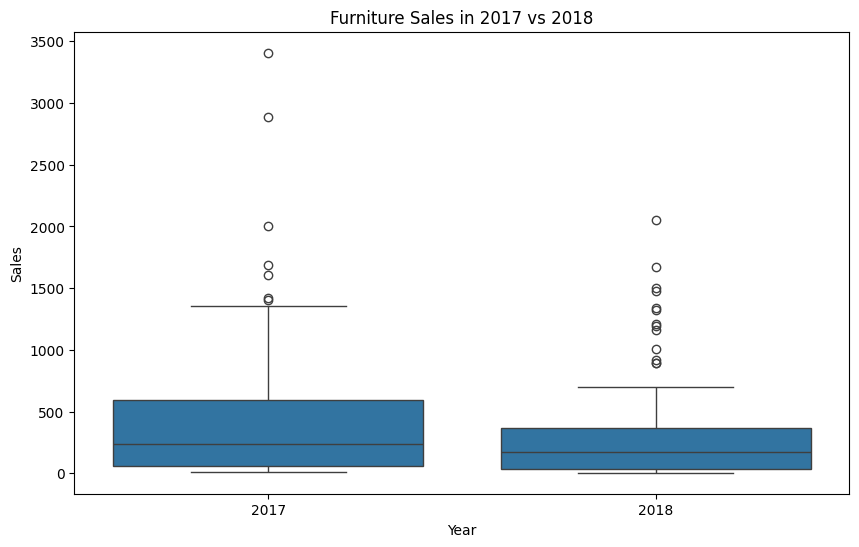

In [12]:
# Box Plot for Furniture Sales

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='sales', data=sales_ca[(sales_ca['category'] == 'furniture') & (sales_ca['year'].isin([2017, 2018]))])
plt.title('Furniture Sales in 2017 vs 2018')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks([0, 1], ['2017', '2018'])
plt.show()


In [13]:
# Mann-Whitney U Test for Furniture Sales
#     Performing Mann-Whitney U test to confirm that there is statistically significant difference in sales of furniture between years 2017 and 2018. Then
#     comparing means between two groups to see which year sold more furniture on average. This will help identify which year had statistically
#     significantly more sales of furniture. As the test revealed in 2017 furniture sales on average was more indeed than in 2018.

stat, p = mannwhitneyu(furniture_sales_2017, furniture_sales_2018)
print(f"Mann-Whitney U Test on Furniture Sales\nStatistic: {stat}, p-value: {p}")

median_sales_2017 = furniture_sales_2017.median()
median_sales_2018 = furniture_sales_2018.median()

print(f"Median sales in 2017: {median_sales_2017}")
print(f"Median sales in 2018: {median_sales_2018}")


Mann-Whitney U Test on Furniture Sales
Statistic: 8701.5, p-value: 0.025967416368499887
Median sales in 2017: 239.666
Median sales in 2018: 170.352


# Conclusion

In conclusion, ther is no statistically significant increase in sales from 2017 to 2018 dispite more overall sales and there is statistically significant decrease in furniture sales in particular in 2018. This warrants further research into what accounts for decline in sales in 2018, including changes in consumer demand, product range adjustments, pricing
strategies, or promotional activities specific to the furniture category. Further analysis could also involve looking at the effect size to understand
the magnitude of the difference.